# Project Title:
Flood Prediction & Early Warning System using ML

# Problem Statement:
Floods cause severe loss of life, property, and infrastructure every year. Traditional systems are mostly reactive, giving little time for preparation. There is a need for a predictive, data-driven early warning system that can forecast flood risks in advance using rainfall, weather, and historical data.

# Description:
This project develops a Flood Prediction & Early Warning System using machine learning. Multiple datasets—flood features, rainfall patterns, weather data, and historical flood records—are cleaned, analyzed, and combined to predict flood risks.
Key steps include:
Data cleaning & exploratory analysis
Feature engineering (rainfall indices, risk scores)
ML modeling for flood probability
Generating risk alerts (Low, Medium, High)

### Loading datasets, Displaying first 5 rows of datasets

In [19]:
import os, sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define project root: one level up from notebooks
ROOT = Path(os.getcwd()).resolve().parents[0]

# Add src/ to sys.path so imports work
src_path = ROOT / "src"
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

# Import from paths.py
from paths import DATA_RAW, DATA_PROCESSED, MODELS_DIR, REPORTS_DIR

print("Project root:", ROOT)
print("Raw data:", DATA_RAW)
print("Processed data:", DATA_PROCESSED)


Project root: C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System
Raw data: C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System\data\raw
Processed data: C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System\data\processed


### List all DataSets

In [20]:
# List raw CSVs
csvs = sorted([p for p in DATA_RAW.glob("*.csv")])
for p in csvs:
    print("-", p.name)

- flood_features.csv
- flood_risk_dataset_india.csv
- rainfall_india_1901_2015.csv
- rainfall_normals_district.csv
- weatherHistory_A.csv
- weatherHistory_B.csv


### DataSet Information

In [21]:
from pathlib import Path
import pandas as pd

#  Define project root
ROOT = Path(r"C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System")

# Define raw data folder & get CSVs
DATA_RAW = ROOT / "data" / "raw"
csvs = list(DATA_RAW.glob("*.csv"))
print("Found CSVs:", [p.name for p in csvs])

# Preview each CSV safely
summaries = []
for p in csvs:
    try:
        try:
            df = pd.read_csv(p)  # normal read
        except UnicodeDecodeError:
            df = pd.read_csv(p, encoding="latin1")  # fallback if encoding error
    except Exception as e:
        print(f"Failed to read {p.name}: {e}")
        continue

    # Show metadata
    display(pd.DataFrame({
        "file": [p.name],
        "rows": [len(df)],
        "cols": [df.shape[1]],
        "columns": [list(df.columns)[:12]]
    }))

    # Save summary for later
    summaries.append({
        "file": p.name,
        "rows": int(len(df)),
        "cols": int(df.shape[1]),
        "columns_head": list(df.columns)[:12],
        "na_pct_mean": float(df.isna().mean().mean())
    })

    # Show first 5 rows of dataset
    display(df.head(5))

# Final summary of all datasets
summary_df = pd.DataFrame(summaries)
summary_df


Found CSVs: ['flood_features.csv', 'flood_risk_dataset_india.csv', 'rainfall_india_1901_2015.csv', 'rainfall_normals_district.csv', 'weatherHistory_A.csv', 'weatherHistory_B.csv']


,file,rows,cols,columns
0,flood_features.csv,50000,21,"[MonsoonIntensity, TopographyDrainage, RiverMa..."


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


,file,rows,cols,columns
0,flood_risk_dataset_india.csv,10000,14,"[Latitude, Longitude, Rainfall (mm), Temperatu..."


,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0


,file,rows,cols,columns
0,rainfall_india_1901_2015.csv,4116,19,"[SUBDIVISION, YEAR, JAN, FEB, MAR, APR, MAY, J..."


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


,file,rows,cols,columns
0,rainfall_normals_district.csv,641,19,"[STATE_UT_NAME, DISTRICT, JAN, FEB, MAR, APR, ..."


,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


,file,rows,cols,columns
0,weatherHistory_A.csv,96453,12,"[Formatted Date, Summary, Precip Type, Tempera..."


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


,file,rows,cols,columns
0,weatherHistory_B.csv,96453,12,"[Formatted Date, Summary, Precip Type, Tempera..."


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


,file,rows,cols,columns_head,na_pct_mean
0,flood_features.csv,50000,21,"[MonsoonIntensity, TopographyDrainage, RiverMa...",0.000000
1,flood_risk_dataset_india.csv,10000,14,"[Latitude, Longitude, Rainfall (mm), Temperatu...",0.000000
2,rainfall_india_1901_2015.csv,4116,19,"[SUBDIVISION, YEAR, JAN, FEB, MAR, APR, MAY, J...",0.001713
3,rainfall_normals_district.csv,641,19,"[STATE_UT_NAME, DISTRICT, JAN, FEB, MAR, APR, ...",0.000000
4,weatherHistory_A.csv,96453,12,"[Formatted Date, Summary, Precip Type, Tempera...",0.000447
5,weatherHistory_B.csv,96453,12,"[Formatted Date, Summary, Precip Type, Tempera...",0.000447


In [15]:
import sys
!{sys.executable} -m pip install -U pandas pyarrow

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import pandas as pd
print("Pandas version:", pd.__version__)


Pandas version: 2.3.2


### Statistics for all datasets

In [22]:
#statistics for data
for p in csvs:
    try:
        try:
            df = pd.read_csv(p)
        except UnicodeDecodeError:
            df = pd.read_csv(p, encoding="latin1")
    except Exception as e:
        print(f"Failed to read {p.name}: {e}")
        continue

    print(f"\n--- Statistics for {p.name} ---")
    display(df.describe(include="all").transpose())  # stats per dataset



--- Statistics for flood_features.csv ---


,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,50000.0,4.99148,2.236834,0.000,3.000,5.0,6.000,16.000
TopographyDrainage,50000.0,4.98410,2.246488,0.000,3.000,5.0,6.000,18.000
RiverManagement,50000.0,5.01594,2.231310,0.000,3.000,5.0,6.000,16.000
Deforestation,50000.0,5.00848,2.222743,0.000,3.000,5.0,6.000,17.000
Urbanization,50000.0,4.98906,2.243159,0.000,3.000,5.0,6.000,17.000
ClimateChange,50000.0,4.98834,2.226761,0.000,3.000,5.0,6.000,17.000
DamsQuality,50000.0,5.01536,2.245000,0.000,3.000,5.0,6.000,16.000
Siltation,50000.0,4.98860,2.232642,0.000,3.000,5.0,6.000,16.000
AgriculturalPractices,50000.0,5.00612,2.234588,0.000,3.000,5.0,6.000,16.000
Encroachments,50000.0,5.00638,2.241633,0.000,3.000,5.0,6.000,18.000



--- Statistics for flood_risk_dataset_india.csv ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Latitude,10000.0,NaN,NaN,NaN,22.330627,8.341274,8.000337,15.143537,22.28333,29.460184,36.991813
Longitude,10000.0,NaN,NaN,NaN,82.631366,8.389542,68.004575,75.364428,82.671007,89.937897,96.99782
Rainfall (mm),10000.0,NaN,NaN,NaN,150.015118,86.032127,0.014437,76.124373,150.620428,223.402156,299.970293
Temperature (°C),10000.0,NaN,NaN,NaN,29.961401,8.669838,15.000166,22.405717,30.000907,37.413488,44.993681
Humidity (%),10000.0,NaN,NaN,NaN,59.749104,23.142734,20.001339,39.541778,59.497375,80.038163,99.997772
River Discharge (m³/s),10000.0,NaN,NaN,NaN,2515.722946,1441.706442,0.042161,1284.782376,2530.451944,3767.229862,4999.69848
Water Level (m),10000.0,NaN,NaN,NaN,5.017881,2.876579,0.002701,2.538847,5.042094,7.524692,9.996899
Elevation (m),10000.0,NaN,NaN,NaN,4417.138177,2530.245421,1.15034,2229.681903,4417.199761,6616.729066,8846.894877
Land Cover,10000,5,Water Body,2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Soil Type,10000,5,Peat,2052,NaN,NaN,NaN,NaN,NaN,NaN,NaN



--- Statistics for rainfall_india_1901_2015.csv ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SUBDIVISION,4116,36,WEST MADHYA PRADESH,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR,4116.0,NaN,NaN,NaN,1958.218659,33.140898,1901.0,1930.0,1958.0,1987.0,2015.0
JAN,4112.0,NaN,NaN,NaN,18.95732,33.585371,0.0,0.6,6.0,22.2,583.7
FEB,4113.0,NaN,NaN,NaN,21.805325,35.909488,0.0,0.6,6.7,26.8,403.5
MAR,4110.0,NaN,NaN,NaN,27.359197,46.959424,0.0,1.0,7.8,31.3,605.6
APR,4112.0,NaN,NaN,NaN,43.127432,67.831168,0.0,3.0,15.7,49.95,595.1
MAY,4113.0,NaN,NaN,NaN,85.745417,123.234904,0.0,8.6,36.6,97.2,1168.6
JUN,4111.0,NaN,NaN,NaN,230.234444,234.710758,0.4,70.35,138.7,305.15,1609.9
JUL,4109.0,NaN,NaN,NaN,347.214334,269.539667,0.0,175.6,284.8,418.4,2362.8
AUG,4112.0,NaN,NaN,NaN,290.263497,188.770477,0.0,155.975,259.4,377.8,1664.6



--- Statistics for rainfall_normals_district.csv ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
STATE_UT_NAME,641,35,UTTAR PRADESH,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTRICT,641,637,BIJAPUR,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JAN,641.0,NaN,NaN,NaN,18.35507,21.082806,0.0,6.9,13.3,19.2,144.5
FEB,641.0,NaN,NaN,NaN,20.984399,27.729596,0.0,7.0,12.3,24.1,229.6
MAR,641.0,NaN,NaN,NaN,30.034789,45.451082,0.0,7.0,12.7,33.2,367.9
APR,641.0,NaN,NaN,NaN,45.543214,71.556279,0.0,5.0,15.1,48.3,554.4
MAY,641.0,NaN,NaN,NaN,81.535101,111.96039,0.9,12.1,33.9,91.9,733.7
JUN,641.0,NaN,NaN,NaN,196.007332,196.556284,3.8,68.8,131.9,226.6,1476.2
JUL,641.0,NaN,NaN,NaN,326.033697,221.364643,11.6,206.4,293.7,374.8,1820.9
AUG,641.0,NaN,NaN,NaN,291.152262,152.647325,14.1,194.6,284.8,358.1,1522.1



--- Statistics for weatherHistory_A.csv ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Formatted Date,96453,96429,2010-08-02 00:00:00.000 +0200,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Summary,96453,27,Partly Cloudy,31733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precip Type,95936,2,rain,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature (C),96453.0,NaN,NaN,NaN,11.932678,9.551546,-21.822222,4.688889,12.0,18.838889,39.905556
Apparent Temperature (C),96453.0,NaN,NaN,NaN,10.855029,10.696847,-27.716667,2.311111,12.0,18.838889,39.344444
Humidity,96453.0,NaN,NaN,NaN,0.734899,0.195473,0.0,0.6,0.78,0.89,1.0
Wind Speed (km/h),96453.0,NaN,NaN,NaN,10.81064,6.913571,0.0,5.8282,9.9659,14.1358,63.8526
Wind Bearing (degrees),96453.0,NaN,NaN,NaN,187.509232,107.383428,0.0,116.0,180.0,290.0,359.0
Visibility (km),96453.0,NaN,NaN,NaN,10.347325,4.192123,0.0,8.3398,10.0464,14.812,16.1
Loud Cover,96453.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0



--- Statistics for weatherHistory_B.csv ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Formatted Date,96453,96429,2010-08-02 00:00:00.000 +0200,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Summary,96453,27,Partly Cloudy,31733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precip Type,95936,2,rain,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature (C),96453.0,NaN,NaN,NaN,11.932678,9.551546,-21.822222,4.688889,12.0,18.838889,39.905556
Apparent Temperature (C),96453.0,NaN,NaN,NaN,10.855029,10.696847,-27.716667,2.311111,12.0,18.838889,39.344444
Humidity,96453.0,NaN,NaN,NaN,0.734899,0.195473,0.0,0.6,0.78,0.89,1.0
Wind Speed (km/h),96453.0,NaN,NaN,NaN,10.81064,6.913571,0.0,5.8282,9.9659,14.1358,63.8526
Wind Bearing (degrees),96453.0,NaN,NaN,NaN,187.509232,107.383428,0.0,116.0,180.0,290.0,359.0
Visibility (km),96453.0,NaN,NaN,NaN,10.347325,4.192123,0.0,8.3398,10.0464,14.812,16.1
Loud Cover,96453.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Find the missing values of all datasets

In [23]:
#find the missing values
for p in csvs:
    try:
        try:
            df = pd.read_csv(p)   # normal read
        except UnicodeDecodeError:
            df = pd.read_csv(p, encoding="latin1")   # fallback if encoding error
    except Exception as e:
        print(f"Failed to read {p.name}: {e}")
        continue

    print(f"\n--- Missing Values in {p.name} ---")
    display(df.isnull().sum())   # count missing per column



--- Missing Values in flood_features.csv ---


MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


--- Missing Values in flood_risk_dataset_india.csv ---


Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64


--- Missing Values in rainfall_india_1901_2015.csv ---


SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64


--- Missing Values in rainfall_normals_district.csv ---


STATE_UT_NAME    0
DISTRICT         0
JAN              0
FEB              0
MAR              0
APR              0
MAY              0
JUN              0
JUL              0
AUG              0
SEP              0
OCT              0
NOV              0
DEC              0
ANNUAL           0
Jan-Feb          0
Mar-May          0
Jun-Sep          0
Oct-Dec          0
dtype: int64


--- Missing Values in weatherHistory_A.csv ---


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


--- Missing Values in weatherHistory_B.csv ---


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

### Listing how many rows and columns are there in each datasets

In [24]:
# Rows and Columns
for p in csvs:
    try:
        try:
            df = pd.read_csv(p)
        except UnicodeDecodeError:
            df = pd.read_csv(p, encoding="latin1")
    except Exception as e:
        print(f"Failed to read {p.name}: {e}")
        continue

    print(f"{p.name} → Rows: {df.shape[0]}, Cols: {df.shape[1]}")


flood_features.csv → Rows: 50000, Cols: 21
flood_risk_dataset_india.csv → Rows: 10000, Cols: 14
rainfall_india_1901_2015.csv → Rows: 4116, Cols: 19
rainfall_normals_district.csv → Rows: 641, Cols: 19
weatherHistory_A.csv → Rows: 96453, Cols: 12
weatherHistory_B.csv → Rows: 96453, Cols: 12


### Listing all columns in all datasets

In [25]:
#Lists all coloumns in all datasets
for p in csvs:
    try:
        try:
            df = pd.read_csv(p)
        except UnicodeDecodeError:
            df = pd.read_csv(p, encoding="latin1")
    except Exception as e:
        print(f"Failed to read {p.name}: {e}")
        continue

    print(f"\n--- Columns in {p.name} ---")
    print(list(df.columns))



--- Columns in flood_features.csv ---
['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']

--- Columns in flood_risk_dataset_india.csv ---
['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)', 'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)', 'Land Cover', 'Soil Type', 'Population Density', 'Infrastructure', 'Historical Floods', 'Flood Occurred']

--- Columns in rainfall_india_1901_2015.csv ---
['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

--- Columns in rainfall_normals_distri

### EDA

=== flood_risk dataset ===
Shape: (1000, 14)
Columns: ['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)', 'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)', 'Land Cover', 'Soil Type', 'Population Density', 'Infrastructure', 'Historical Floods', 'Flood Occurred']
Missing values:
 Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64




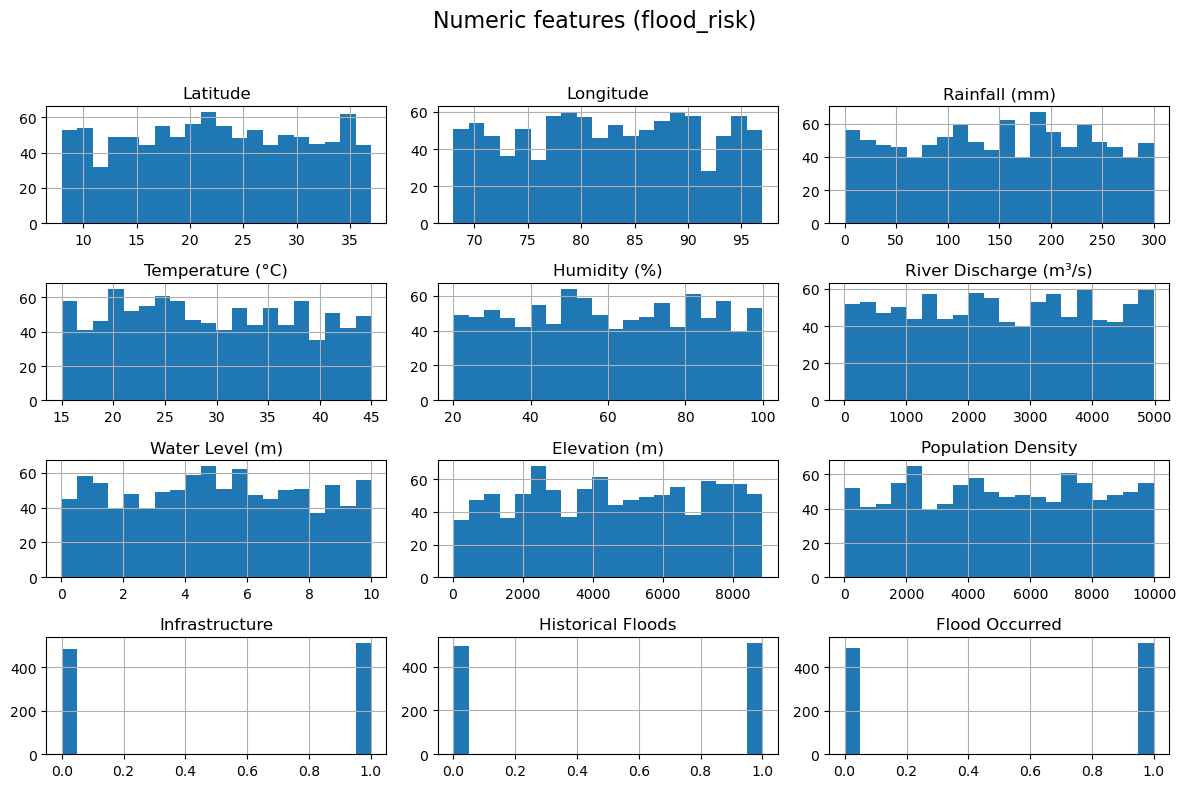

Top counts for Land Cover (flood_risk):
Land Cover
Desert          237
Forest          216
Water Body      186
Agricultural    184
Urban           177
Name: count, dtype: int64


Top counts for Soil Type (flood_risk):
Soil Type
Peat     211
Clay     204
Sandy    200
Silt     197
Loam     188
Name: count, dtype: int64


=== weather_a dataset ===
Shape: (1000, 12)
Columns: ['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']
Missing values:
 Formatted Date              0
Summary                     0
Precip Type                 7
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64




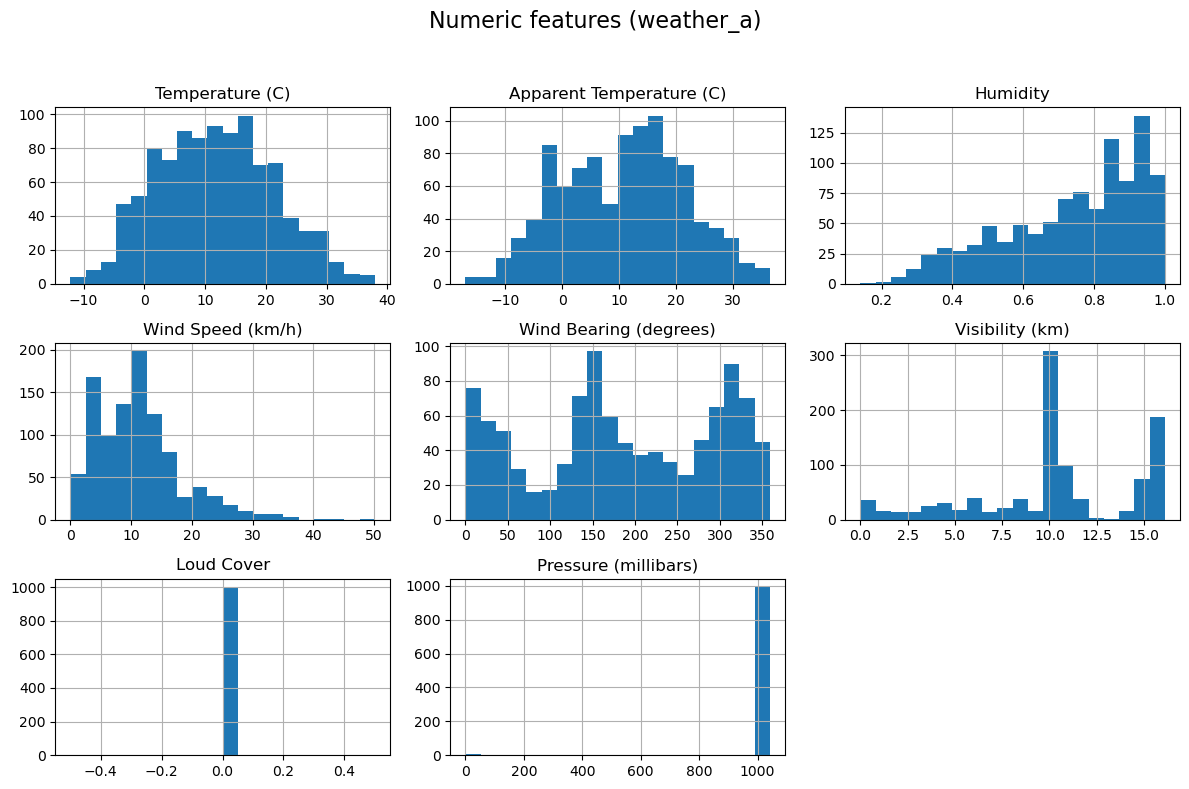

Top counts for Formatted Date (weather_a):
Formatted Date
2015-09-19 17:00:00.000 +0200    1
2015-12-27 09:00:00.000 +0100    1
2008-06-02 13:00:00.000 +0200    1
2007-05-17 06:00:00.000 +0200    1
2008-10-27 01:00:00.000 +0100    1
Name: count, dtype: int64


Top counts for Summary (weather_a):
Summary
Partly Cloudy    342
Mostly Cloudy    275
Overcast         187
Clear             94
Foggy             77
Name: count, dtype: int64


Top counts for Precip Type (weather_a):
Precip Type
rain    875
snow    118
Name: count, dtype: int64


Top counts for Daily Summary (weather_a):
Daily Summary
Mostly cloudy throughout the day.         213
Partly cloudy throughout the day.         104
Partly cloudy starting in the morning.     56
Partly cloudy until night.                 49
Overcast throughout the day.               37
Name: count, dtype: int64


=== weather_b dataset ===
Shape: (1000, 12)
Columns: ['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',

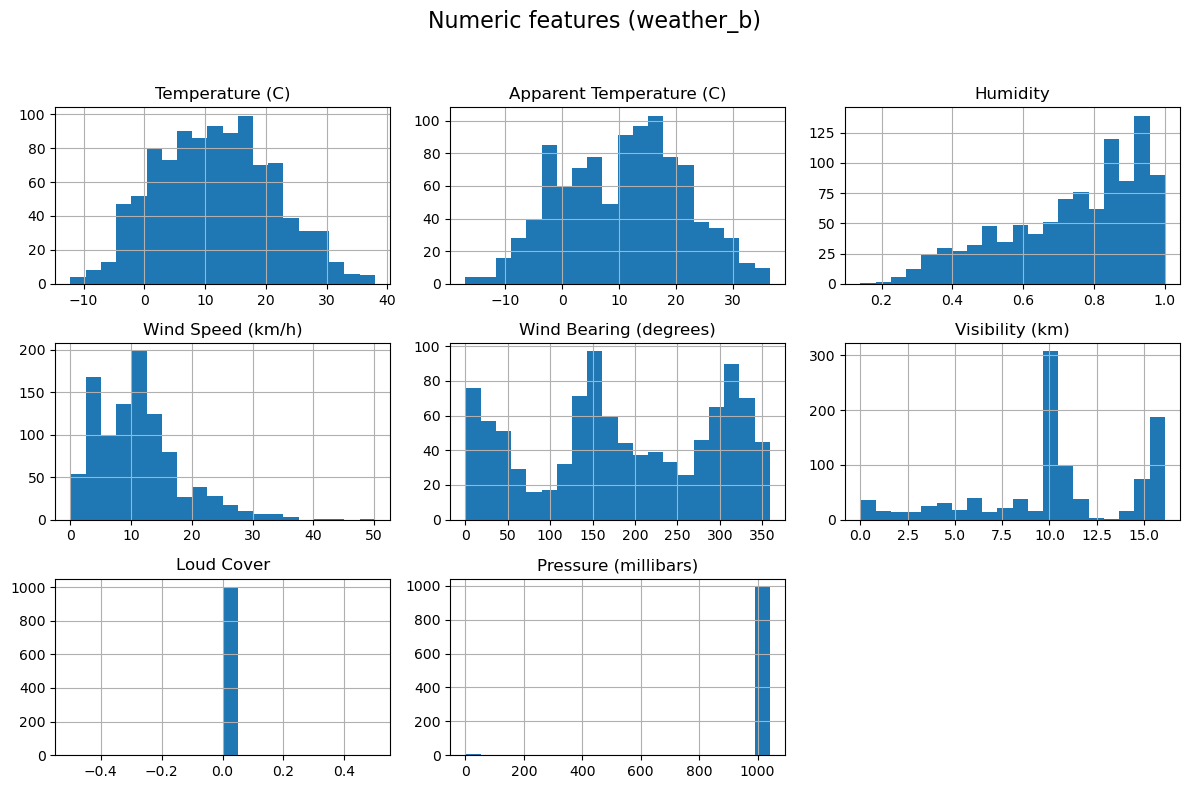

Top counts for Formatted Date (weather_b):
Formatted Date
2015-09-19 17:00:00.000 +0200    1
2015-12-27 09:00:00.000 +0100    1
2008-06-02 13:00:00.000 +0200    1
2007-05-17 06:00:00.000 +0200    1
2008-10-27 01:00:00.000 +0100    1
Name: count, dtype: int64


Top counts for Summary (weather_b):
Summary
Partly Cloudy    342
Mostly Cloudy    275
Overcast         187
Clear             94
Foggy             77
Name: count, dtype: int64


Top counts for Precip Type (weather_b):
Precip Type
rain    875
snow    118
Name: count, dtype: int64


Top counts for Daily Summary (weather_b):
Daily Summary
Mostly cloudy throughout the day.         213
Partly cloudy throughout the day.         104
Partly cloudy starting in the morning.     56
Partly cloudy until night.                 49
Overcast throughout the day.               37
Name: count, dtype: int64


=== rainfall_hist dataset ===
Shape: (1000, 19)
Columns: ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 

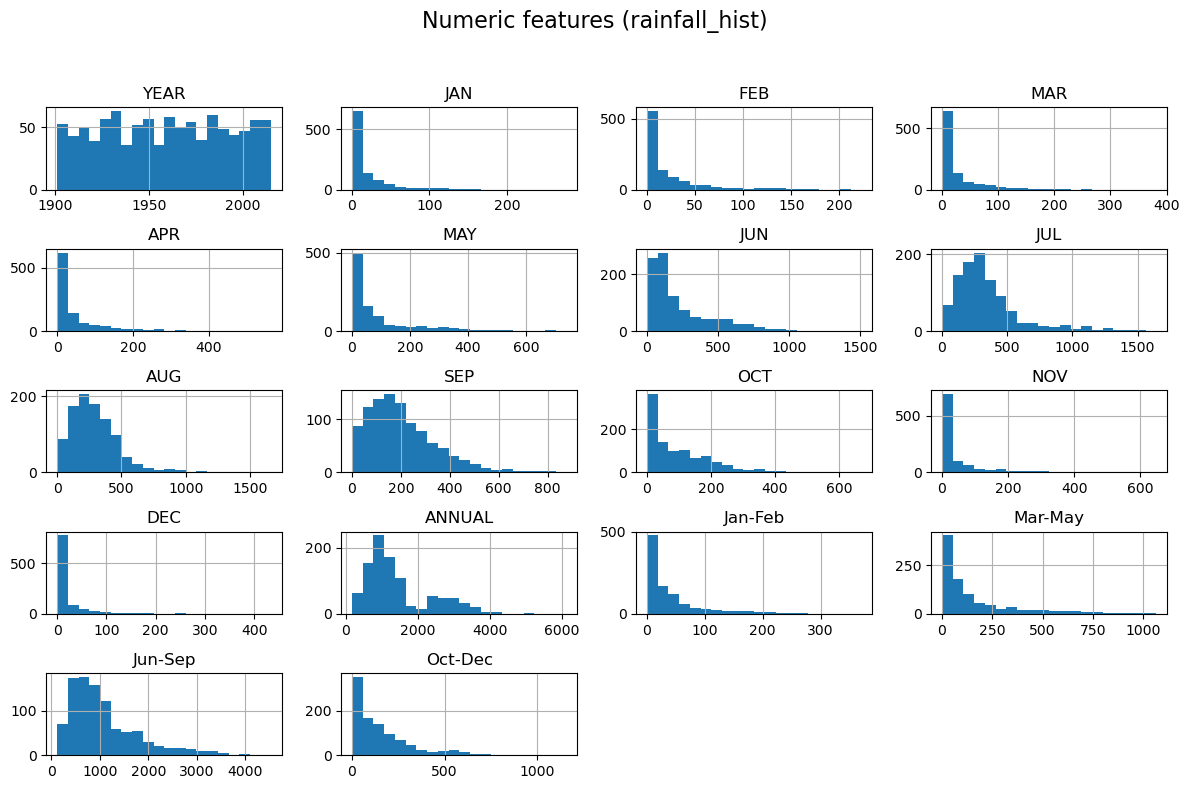

Top counts for SUBDIVISION (rainfall_hist):
SUBDIVISION
ASSAM & MEGHALAYA            38
SAURASHTRA & KUTCH           37
ANDAMAN & NICOBAR ISLANDS    35
KERALA                       33
COASTAL KARNATAKA            33
Name: count, dtype: int64


=== rainfall_normals dataset ===
Shape: (641, 19)
Columns: ['STATE_UT_NAME', 'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
Missing values:
 STATE_UT_NAME    0
DISTRICT         0
JAN              0
FEB              0
MAR              0
APR              0
MAY              0
JUN              0
JUL              0
AUG              0
SEP              0
OCT              0
NOV              0
DEC              0
ANNUAL           0
Jan-Feb          0
Mar-May          0
Jun-Sep          0
Oct-Dec          0
dtype: int64




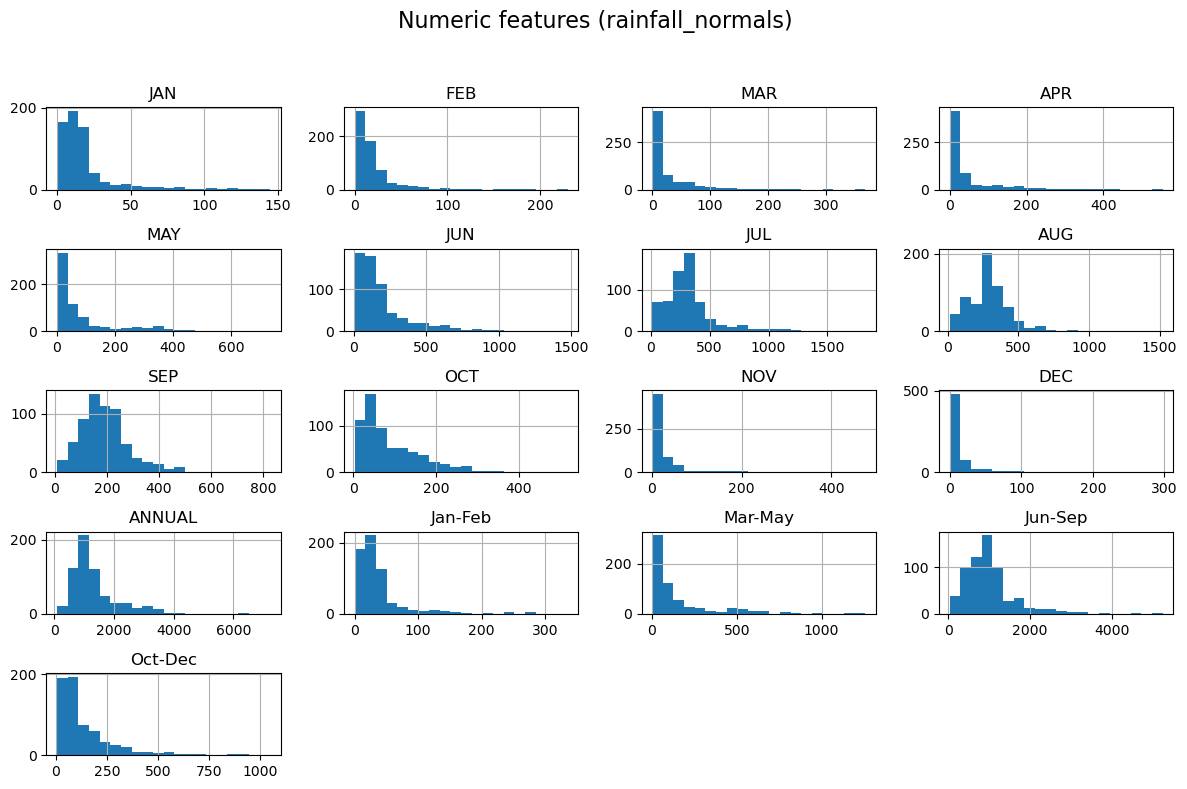

Top counts for STATE_UT_NAME (rainfall_normals):
STATE_UT_NAME
UTTAR PRADESH     71
MADHYA PRADESH    50
BIHAR             38
MAHARASHTRA       35
RAJASTHAN         33
Name: count, dtype: int64


Top counts for DISTRICT (rainfall_normals):
DISTRICT
BIJAPUR       2
BILASPUR      2
AURANGABAD    2
HAMIRPUR      2
NICOBAR       1
Name: count, dtype: int64


=== flood_features dataset ===
Shape: (1000, 21)
Columns: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']
Missing values:
 MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urban

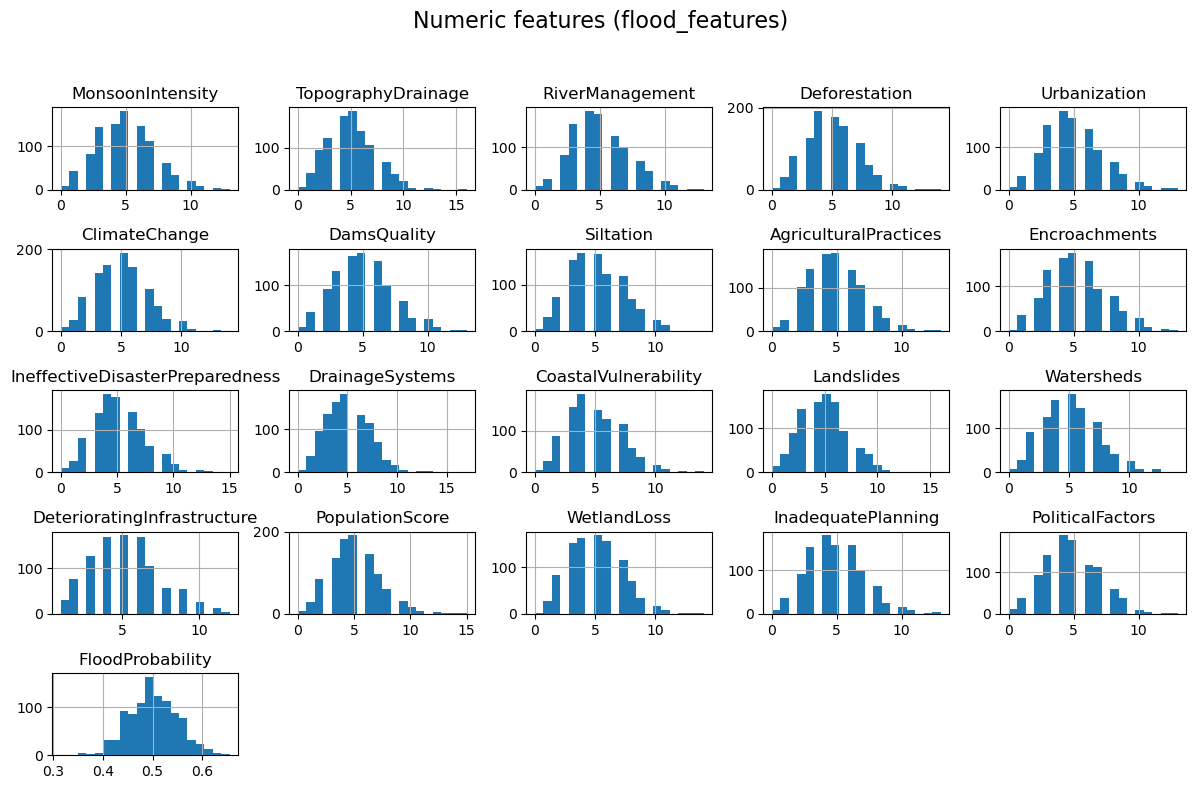

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


# Paths
ROOT = Path(r"C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System\data\raw")
files = {
    "flood_risk": "flood_risk_dataset_india.csv",
    "weather_a": "weatherHistory_A.csv",
    "weather_b": "weatherHistory_B.csv",
    "rainfall_hist": "rainfall_india_1901_2015.csv",
    "rainfall_normals": "rainfall_normals_district.csv",
    "flood_features": "flood_features.csv"
}

# Load datasets (fast)
dfs = {name: pd.read_csv(ROOT / fname) for name, fname in files.items()}

# Sample datasets
sample_size = 1000
for name, df in dfs.items():
    if df.shape[0] > sample_size:
        dfs[name] = df.sample(n=sample_size, random_state=42)
    else:
        dfs[name] = df.copy()

# Quick numeric overview
for name, df in dfs.items():
    print(f"=== {name} dataset ===")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
    print("Missing values:\n", df.isna().sum())
    print("\n")

    # Numeric histograms
    num_cols = df.select_dtypes(include=['float64','int64']).columns
    if len(num_cols) > 0:
        df[num_cols].hist(figsize=(12,8), bins=20)
        plt.suptitle(f"Numeric features ({name})", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # 🔹 Prevents overlap
        plt.show()

    # Top 5 categorical counts
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        print(f"Top counts for {col} ({name}):")
        print(df[col].value_counts().head())
        print("\n")


### Preprocessing of all DataSets

In [49]:
import pandas as pd
from pathlib import Path


#  Define paths

ROOT = Path(r"C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System")
DATA_RAW = ROOT / "data" / "raw"
DATA_PROCESSED = ROOT / "data" / "processed"

# Make sure processed folder exists
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)


# Function: preprocess dataset

def preprocess_csv(in_path: Path, out_path: Path):
    print(f"\n Processing {in_path.name} ...")

    # Load
    try:
        df = pd.read_csv(in_path)
    except UnicodeDecodeError:
        df = pd.read_csv(in_path, encoding="latin1")

    print("Before:")
    print(df.info())

    # Standardize column names 
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(" ", "_")
                  .str.replace(r"[()/%]", "", regex=True)
    )

    # Detect and parse datetime columns
    datetime_cols = [c for c in df.columns if "date" in c or "time" in c]
    for col in datetime_cols:
        try:
            df[col] = pd.to_datetime(df[col], errors="coerce", utc=True)
        except Exception:
            pass

    #  Handle missing values 
    na_rate = df.isna().mean()
    drop_cols = na_rate[na_rate > 0.4].index  # drop cols with >40% missing
    if len(drop_cols) > 0:
        print(f"   Dropping {len(drop_cols)} columns with >40% missing: {list(drop_cols)}")
        df = df.drop(columns=drop_cols)

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].ffill()
        else:
            df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else "Unknown")

    # Save cleaned dataset
    df.to_csv(out_path, index=False)

    print("After:")
    print(df.info())
    print(f" Saved cleaned file → {out_path.name}")
    return df


# 3. Loop through all raw CSVs

csv_files = list(DATA_RAW.glob("*.csv"))
print(f"Found {len(csv_files)} raw CSV files.")

cleaned_dfs = {}
for file in csv_files:
    out_file = DATA_PROCESSED / f"{file.stem}_cleaned.csv"
    cleaned_dfs[file.stem] = preprocess_csv(file, out_file)

print("\n Preprocessing complete! All cleaned datasets saved in:", DATA_PROCESSED)

Found 6 raw CSV files.

 Processing flood_features.csv ...
Before:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSyste

### Printing all columns of Cleaned Datasets

In [38]:
import pandas as pd
from pathlib import Path

# Path to processed datasets
DATA_PROCESSED = Path(r"C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System\data\processed")

# Find all CSVs
csv_files = list(DATA_PROCESSED.glob("*_cleaned.csv"))
print(f"Found {len(csv_files)} cleaned CSV files.\n")

# Loop and print columns
for file in csv_files:
    df = pd.read_csv(file)
    print(f"--- Columns in {file.name} ---")
    print(df.columns.tolist(), "\n")


Found 7 cleaned CSV files.

--- Columns in flood_features_cleaned.csv ---
['monsoonintensity', 'topographydrainage', 'rivermanagement', 'deforestation', 'urbanization', 'climatechange', 'damsquality', 'siltation', 'agriculturalpractices', 'encroachments', 'ineffectivedisasterpreparedness', 'drainagesystems', 'coastalvulnerability', 'landslides', 'watersheds', 'deterioratinginfrastructure', 'populationscore', 'wetlandloss', 'inadequateplanning', 'politicalfactors', 'floodprobability'] 

--- Columns in flood_risk_dataset_india_cleaned.csv ---
['latitude', 'longitude', 'rainfall_mm', 'temperature_°c', 'humidity_', 'river_discharge_m³s', 'water_level_m', 'elevation_m', 'land_cover', 'soil_type', 'population_density', 'infrastructure', 'historical_floods', 'flood_occurred'] 

--- Columns in rainfall_india_1901_2015_cleaned.csv ---
['subdivision', 'year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'annual', 'jan-feb', 'mar-may', 'jun-sep', 'oct-dec'] 

### Merged 4 DataSets to flood_ml_dataset_clean.csv
flood_risk_dataset_india_cleaned.csv,
rainfall_india_1901_2015_cleaned.csv,
rainfall_normals_district_cleaned.csv,
flood_features_cleaned.csv   to flood_ml_dataset_clean.csv

In [48]:
import pandas as pd
from pathlib import Path


# Define paths

ROOT = Path(r"C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System")
DATA_PROCESSED = ROOT / "data" / "processed"
FINAL_DATASET = DATA_PROCESSED / "flood_ml_dataset_clean.csv"


# Load cleaned datasets

flood_risk = pd.read_csv(DATA_PROCESSED / "flood_risk_dataset_india_cleaned.csv")
rainfall_hist = pd.read_csv(DATA_PROCESSED / "rainfall_india_1901_2015_cleaned.csv")
rainfall_normals = pd.read_csv(DATA_PROCESSED / "rainfall_normals_district_cleaned.csv")
flood_features = pd.read_csv(DATA_PROCESSED / "flood_features_cleaned.csv")

# Prepare flood_risk year (dummy if needed)

if 'year' not in flood_risk.columns:
    flood_risk['year'] = 2000  # dummy year

#  Merge rainfall historical (annual + monsoon)

rainfall_hist['monsoon_jun_sep'] = rainfall_hist[['jun','jul','aug','sep']].mean(axis=1)
rainfall_hist['annual_rainfall'] = rainfall_hist['annual']

flood_risk = flood_risk.merge(
    rainfall_hist[['year','monsoon_jun_sep','annual_rainfall']],
    on='year',
    how='left'
)


# Merge rainfall normals by district

rainfall_normals['annual_avg'] = rainfall_normals[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']].mean(axis=1)

if 'district' in flood_risk.columns and 'district' in rainfall_normals.columns:
    flood_risk = flood_risk.merge(
        rainfall_normals[['district','annual_avg']],
        on='district',
        how='left'
    )
    flood_risk['rainfall_deviation'] = flood_risk['annual_rainfall'] - flood_risk['annual_avg']


# Merge flood features by district

if 'district' in flood_risk.columns and 'district' in flood_features.columns:
    flood_risk = flood_risk.merge(
        flood_features,
        on='district',
        how='left'
    )


#  Final dataset info

flood_risk.to_csv(FINAL_DATASET, index=False)
print(f"Clean merged dataset saved at: {FINAL_DATASET}")
print(f"Final dataset shape: {flood_risk.shape}")
print("Columns:", list(flood_risk.columns))
print(flood_risk.head())


Clean merged dataset saved at: C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System\data\processed\flood_ml_dataset_clean.csv
Final dataset shape: (360000, 17)
Columns: ['latitude', 'longitude', 'rainfall_mm', 'temperature_°c', 'humidity_', 'river_discharge_m³s', 'water_level_m', 'elevation_m', 'land_cover', 'soil_type', 'population_density', 'infrastructure', 'historical_floods', 'flood_occurred', 'year', 'monsoon_jun_sep', 'annual_rainfall']
    latitude  longitude  rainfall_mm  temperature_°c  humidity_  \
0  18.861663  78.835584   218.999493       34.144337  43.912963   
1  18.861663  78.835584   218.999493       34.144337  43.912963   
2  18.861663  78.835584   218.999493       34.144337  43.912963   
3  18.861663  78.835584   218.999493       34.144337  43.912963   
4  18.861663  78.835584   218.999493       34.144337  43.912963   

   river_discharge_m³s  water_level_m  elevation_m  land_cover soil_type  \
0          4236.182888       7.415552   377.465433  Water Bo

### Merged 2 DataSets to weather_dataset_clean.csv
weatherHistory_A_cleaned.csv,weatherHistory_B_cleaned.csv to weather_dataset_clean.csv

In [47]:
import pandas as pd
from pathlib import Path


# Define paths

ROOT = Path(r"C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System")
DATA_PROCESSED = ROOT / "data" / "processed"
FINAL_WEATHER_DATASET = DATA_PROCESSED / "weather_dataset_clean.csv"


#  Load Weather datasets

weather_a = pd.read_csv(DATA_PROCESSED / "weatherHistory_A_cleaned.csv")
weather_b = pd.read_csv(DATA_PROCESSED / "weatherHistory_B_cleaned.csv")


# Combine Weather datasets

weather = pd.concat([weather_a, weather_b], ignore_index=True)


#  Convert date column to datetime

if 'formatted_date' in weather.columns:
    weather['formatted_date'] = pd.to_datetime(weather['formatted_date'], errors='coerce').dt.tz_localize(None)
else:
    print(" No 'formatted_date' column found!")


# Save final Weather dataset

weather.to_csv(FINAL_WEATHER_DATASET, index=False)
print(f" Weather dataset saved at: {FINAL_WEATHER_DATASET}")
print(f"Weather dataset shape: {weather.shape}")
print(weather.head())


 Weather dataset saved at: C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System\data\processed\weather_dataset_clean.csv
Weather dataset shape: (192906, 12)
       formatted_date        summary precip_type  temperature_c  \
0 2006-03-31 22:00:00  Partly Cloudy        rain       9.472222   
1 2006-03-31 23:00:00  Partly Cloudy        rain       9.355556   
2 2006-04-01 00:00:00  Mostly Cloudy        rain       9.377778   
3 2006-04-01 01:00:00  Partly Cloudy        rain       8.288889   
4 2006-04-01 02:00:00  Mostly Cloudy        rain       8.755556   

   apparent_temperature_c  humidity  wind_speed_kmh  wind_bearing_degrees  \
0                7.388889      0.89         14.1197                 251.0   
1                7.227778      0.86         14.2646                 259.0   
2                9.377778      0.89          3.9284                 204.0   
3                5.944444      0.83         14.1036                 269.0   
4                6.977778      0.83       

### Deleted one column in weather_dataset_clean.csv

In [41]:
import pandas as pd
from pathlib import Path

# Path to your dataset
DATA_PROCESSED = Path(r"C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System\data\processed")
WEATHER_FILE = DATA_PROCESSED / "weather_dataset_clean.csv"

# Load dataset
weather = pd.read_csv(WEATHER_FILE)

# Drop the 'loud_cover' column permanently
weather = weather.drop(columns=['loud_cover'])

# Save the cleaned dataset back
weather.to_csv(WEATHER_FILE, index=False)

print(" 'loud_cover' column deleted permanently.")


 'loud_cover' column deleted permanently.


### Feature Selection

In [50]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import LabelEncoder


#  Define paths

ROOT = Path(r"C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System")
DATA_PROCESSED = ROOT / "data" / "processed"

datasets = {
    "flood_ml": pd.read_csv(DATA_PROCESSED / "flood_ml_dataset_clean.csv"),
    "weather": pd.read_csv(DATA_PROCESSED / "weather_dataset_clean.csv")
}


#  Encode categorical features

def encode_categoricals(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == "object":   # only encode text cols
            df[col] = le.fit_transform(df[col].astype(str))
    return df


#  Compute Feature Importance

def compute_feature_importance(df, target_col, dataset_name):
    df = encode_categoricals(df.copy())   # ensure numeric only
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Detect target type
    target_type = type_of_target(y)
    print(f"\n=== {dataset_name.upper()} Dataset ===")
    print(f"Target '{target_col}' detected as: {target_type}")

    if target_type in ['binary', 'multiclass']:
        model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    else:
        model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

    model.fit(X, y)

    feat_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)

    # Save results
    out_file = DATA_PROCESSED / f"{dataset_name}_feature_importance.csv"
    feat_importance.to_csv(out_file, index=False)

    print(f" Saved feature importance → {out_file}")
    print(feat_importance.head(15))  # top 15
    return feat_importance


#  Run for each dataset


# Flood dataset → assume target = 'flood_occurred'
flood_target = "flood_occurred" if "flood_occurred" in datasets["flood_ml"].columns else datasets["flood_ml"].columns[-1]
compute_feature_importance(datasets["flood_ml"], flood_target, "flood_ml")

# Weather dataset → example target = 'temperature_c'
weather_target = "temperature_c" if "temperature_c" in datasets["weather"].columns else datasets["weather"].columns[-1]
compute_feature_importance(datasets["weather"], weather_target, "weather")



=== FLOOD_ML Dataset ===
Target 'flood_occurred' detected as: binary
 Saved feature importance → C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System\data\processed\flood_ml_feature_importance.csv
                feature  importance
6         water_level_m    0.101602
0              latitude    0.101209
1             longitude    0.101044
3        temperature_°c    0.100797
2           rainfall_mm    0.100722
7           elevation_m    0.100652
5   river_discharge_m³s    0.099914
4             humidity_    0.099905
10   population_density    0.099864
9             soil_type    0.035563
8            land_cover    0.031336
11       infrastructure    0.014014
12    historical_floods    0.013337
15      annual_rainfall    0.000020
14      monsoon_jun_sep    0.000019

=== WEATHER Dataset ===
Target 'temperature_c' detected as: continuous
 Saved feature importance → C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System\data\processed\weather_feature_importance.csv
 

,feature,importance
3,apparent_temperature_c,0.974850
2,precip_type,0.018052
5,wind_speed_kmh,0.006284
4,humidity,0.000781
0,formatted_date,0.000011
9,pressure_millibars,0.000009
7,visibility_km,0.000007
6,wind_bearing_degrees,0.000002
10,daily_summary,0.000002
1,summary,0.000001


### Final Dataset for Modeling

In [51]:
import pandas as pd
from pathlib import Path


# Paths

ROOT = Path(r"C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System")
DATA_PROCESSED = ROOT / "data" / "processed"


# Finalize Flood Dataset

df_flood = pd.read_csv(DATA_PROCESSED / "flood_ml_dataset_clean.csv")
feat_flood = pd.read_csv(DATA_PROCESSED / "flood_ml_feature_importance.csv")

top_features_flood = feat_flood.head(10)["feature"].tolist()
target_flood = "flood_occurred"

flood_final = df_flood[top_features_flood + [target_flood]]
flood_final_path = DATA_PROCESSED / "flood_ml_final.csv"
flood_final.to_csv(flood_final_path, index=False)

print(f"Flood final dataset saved → {flood_final_path}")
print("Flood final shape:", flood_final.shape)


#  Finalize Weather Dataset

df_weather = pd.read_csv(DATA_PROCESSED / "weather_dataset_clean.csv")
feat_weather = pd.read_csv(DATA_PROCESSED / "weather_feature_importance.csv")

top_features_weather = feat_weather.head(10)["feature"].tolist()
target_weather = "temperature_c" if "temperature_c" in df_weather.columns else df_weather.columns[-1]

weather_final = df_weather[top_features_weather + [target_weather]]
weather_final_path = DATA_PROCESSED / "weather_final.csv"
weather_final.to_csv(weather_final_path, index=False)

print(f" Weather final dataset saved → {weather_final_path}")
print("Weather final shape:", weather_final.shape)

Flood final dataset saved → C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System\data\processed\flood_ml_final.csv
Flood final shape: (360000, 11)
 Weather final dataset saved → C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System\data\processed\weather_final.csv
Weather final shape: (192906, 11)


### Train-Test Split for Modeling

In [52]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split


#  Define paths

ROOT = Path(r"C:\Users\HP\Project_Flood\Flood Prediction & Early Warning System")
DATA_PROCESSED = ROOT / "data" / "processed"

# Load finalized datasets
flood_df = pd.read_csv(DATA_PROCESSED / "flood_ml_final.csv")
weather_df = pd.read_csv(DATA_PROCESSED / "weather_final.csv")


# Train-Test Split Function

def split_dataset(df, target_col, name):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y if len(y.unique()) > 1 else None
    )

    print(f"\n {name} Dataset Split Successful!")
    print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

    return X_train, X_test, y_train, y_test


# Split Flood ML Dataset

flood_target = "flood_occurred"  # target column
X_train_flood, X_test_flood, y_train_flood, y_test_flood = split_dataset(
    flood_df, flood_target, "Flood ML"
)


#  Split Weather Dataset

weather_target = "temperature_c"  # target column
X_train_weather, X_test_weather, y_train_weather, y_test_weather = split_dataset(
    weather_df, weather_target, "Weather"
)


 Flood ML Dataset Split Successful!
Training set size: (288000, 10), Testing set size: (72000, 10)

 Weather Dataset Split Successful!
Training set size: (154324, 10), Testing set size: (38582, 10)


### Flood Dataset: Random Forest Model Training & Evaluation

✅ Random Forest Model Trained Successfully on Flood Dataset!

 * Accuracy: 0.8905555555555555

 * Confusion Matrix:
 [[32279  3311]
 [ 4569 31841]]

 * Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     35590
           1       0.91      0.87      0.89     36410

    accuracy                           0.89     72000
   macro avg       0.89      0.89      0.89     72000
weighted avg       0.89      0.89      0.89     72000



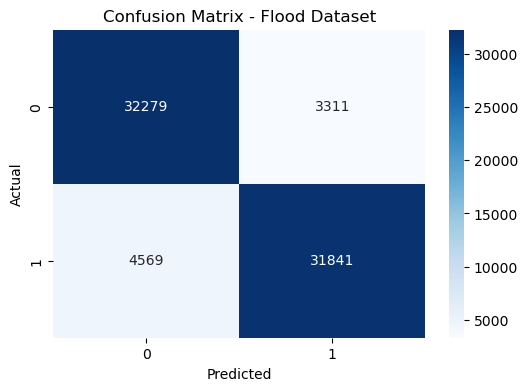

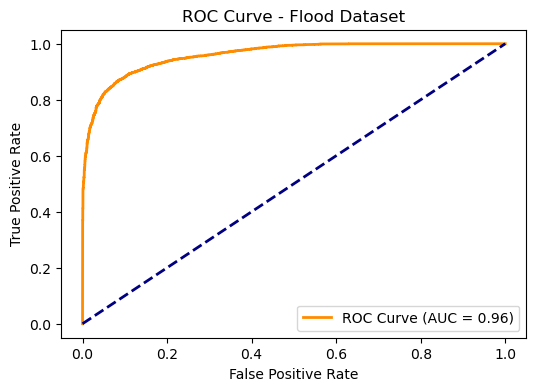


Top 10 Important Features:
               feature  importance
4          rainfall_mm    0.114081
6  river_discharge_m³s    0.113785
5          elevation_m    0.112833
2            longitude    0.112343
3       temperature_°c    0.109991
7            humidity_    0.107352
0        water_level_m    0.104376
1             latitude    0.099427
8   population_density    0.098390
9            soil_type    0.027421


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)


# Encode categorical features in Flood dataset

def encode_categoricals(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == "object":   # only encode text columns
            df[col] = le.fit_transform(df[col].astype(str))
    return df

# Apply encoding
X_train_flood_enc = encode_categoricals(X_train_flood.copy())
X_test_flood_enc = encode_categoricals(X_test_flood.copy())


# Train Random Forest on Flood Dataset

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_flood_enc, y_train_flood)


#  Evaluate Model

y_pred = rf_model.predict(X_test_flood_enc)
y_pred_proba = rf_model.predict_proba(X_test_flood_enc)[:, 1]  # for ROC-AUC

print("✅ Random Forest Model Trained Successfully on Flood Dataset!\n")
print(" * Accuracy:", accuracy_score(y_test_flood, y_pred))
print("\n * Confusion Matrix:\n", confusion_matrix(y_test_flood, y_pred))
print("\n * Classification Report:\n", classification_report(y_test_flood, y_pred))


#  Visual Confusion Matrix

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_flood, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Flood Dataset")
plt.show()


#  ROC Curve & AUC

fpr, tpr, thresholds = roc_curve(y_test_flood, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Flood Dataset")
plt.legend(loc="lower right")
plt.show()


# Feature Importance

feat_importance = pd.DataFrame({
    "feature": X_train_flood_enc.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nTop 10 Important Features:")
print(feat_importance.head(10))
